In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

path='../data/Paris/listings.csv'
raw = pd.read_csv(path)
df = raw.copy()

df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month','listing_url','property_type','number_of_reviews_ltm','has_availability','last_review']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수',
    'listing_url':'url',
    'property_type':'숙소_특징',
    'number_of_reviews_ltm':'12개월_리뷰수',
    'has_availability':'예약가능여부',
    'last_review':'마지막_리뷰'
})


# 슈퍼호스트, 리뷰수 결측치 제거
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']>2]
print(f"리뷰수 제거 : {len(df)}")

# 숙소가격 null값 제거
df= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 유형 제거 
df = df[(df['숙소_유형']=='Entire home/apt') | (df['숙소_유형']=='Private room')]
print(f"숙소_유형 제거 : {len(df)}")

# 12개월 리뷰수 0 개 제거
df = df[df['12개월_리뷰수']!=0]
print(f"12개월_리뷰수 0개 제거 : {len(df)}")

# 욕실수, 침실수, 침대수 null값 제거
df = df.dropna(subset=['욕실수', '침실수', '침대수'])
print(f"욕실수, 침실수, 침대수 제거 후 : {len(df)}")

# 리뷰  null값 제거
df = df.dropna(subset=['숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수'])
print(f"리뷰 결측치 제거 후 : {len(df)}")


# 예약 가능여부 f 버리기
df = df.dropna(subset='예약가능여부')
print(f"예약가능여부 : {len(df)}")

처음 df : 84397
슈퍼호스트 제거 : 84306
리뷰수 제거 : 47841
숙소_유형 제거 : 34280
12개월_리뷰수 0개 제거 : 31052
욕실수, 침실수, 침대수 제거 후 : 30997
리뷰 결측치 제거 후 : 30997
예약가능여부 : 30990


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30990 entries, 1 to 83393
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        30990 non-null  int64  
 1   호스트_id       30990 non-null  int64  
 2   슈퍼호스트        30990 non-null  object 
 3   숙소_수         30990 non-null  float64
 4   숙소_지역        30990 non-null  object 
 5   숙소_유형        30990 non-null  object 
 6   수용_인원수       30990 non-null  int64  
 7   욕실수          30990 non-null  float64
 8   침실수          30990 non-null  float64
 9   침대수          30990 non-null  float64
 10  편의시설         30990 non-null  object 
 11  숙소_가격        30990 non-null  float64
 12  최소_숙박일       30990 non-null  int64  
 13  최대_숙박일       30990 non-null  int64  
 14  리뷰수          30990 non-null  int64  
 15  30일_리뷰수      30990 non-null  int64  
 16  리뷰점수         30990 non-null  float64
 17  숙소_정확성_리뷰점수  30990 non-null  float64
 18  숙소_청결도_리뷰점수  30990 non-null  float64
 19  숙소_체크인_리뷰

In [3]:
df.isnull().sum()

숙소_id          0
호스트_id         0
슈퍼호스트          0
숙소_수           0
숙소_지역          0
숙소_유형          0
수용_인원수         0
욕실수            0
침실수            0
침대수            0
편의시설           0
숙소_가격          0
최소_숙박일         0
최대_숙박일         0
리뷰수            0
30일_리뷰수        0
리뷰점수           0
숙소_정확성_리뷰점수    0
숙소_청결도_리뷰점수    0
숙소_체크인_리뷰점수    0
숙소_소통_리뷰점수     0
숙소_위치_리뷰점수     0
숙소_가격_리뷰점수     0
평균_리뷰수         0
url            0
숙소_특징          0
12개월_리뷰수       0
예약가능여부         0
마지막_리뷰         0
dtype: int64

슈퍼호스트 라벨 인코딩 진행

In [4]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 슈퍼호스트 열에 대해 라벨 인코딩 적용
df['슈퍼호스트_인코딩'] = label_encoder.fit_transform(df['슈퍼호스트'])

# 변환된 데이터 확인
print(df[['슈퍼호스트', '슈퍼호스트_인코딩']].head())

  슈퍼호스트  슈퍼호스트_인코딩
1     t          1
2     f          0
3     f          0
6     t          1
8     t          1


EDA 분석 시작

숙소_가격 이상치 확인

In [5]:
df['숙소_가격'].value_counts()

숙소_가격
150.0     891
120.0     845
100.0     832
200.0     677
90.0      665
         ... 
518.0       1
944.0       1
733.0       1
452.0       1
2600.0      1
Name: count, Length: 887, dtype: int64

In [6]:
# 수용_인원수 박스플랏 확인

import plotly.express as px

# 박스 플롯 생성
fig = px.box(df, y=df['숙소_가격'], title='Box Plot of 숙소_가격')

# 크기 설정 (너비: 6인치, 높이: 12인치)
fig.update_layout(
    width=6*96,  # 1인치 = 96픽셀
    height=12*96
)

# 출력
fig.show()

민석님이 분석한 런던 데이터에서 숙소_가격 처리방법을 보니 마지막 리뷰가 해결책일 가능성이 있는 것 같음.

In [7]:
# 데이터 타입 변경 >> datetime
df['마지막_리뷰'] = pd.to_datetime(df['마지막_리뷰'])

# 마지막 리뷰가 적힌 년도 >> 파생변수 생성
df['마지막_리뷰_year'] = df['마지막_리뷰'].dt.year

# 마지막 리뷰 년도별 숙소 가격 기초 통계 요약
마지막리뷰_년도별_숙소가격 = \
df.groupby('마지막_리뷰_year')['숙소_가격'].agg(
    count='size',
    mean='mean',
    std='std',
    min='min',
    max='max',
    median='median'
).reset_index().sort_values(by='마지막_리뷰_year', ascending=False).reset_index(drop=True)

In [8]:
마지막리뷰_년도별_숙소가격

,마지막_리뷰_year,count,mean,std,min,max,median
0,2024,19184,184.403565,248.864888,10.0,9999.0,136.0
1,2023,11806,218.897086,658.337585,19.0,53239.0,150.0


파리 데이터는 2024년도와 2023년도가 끝이네?
 - 처리를 어떻게 하나...
 - 일단 처리 안하고 감.

수용인원수에 따른 숙소_가격 확인


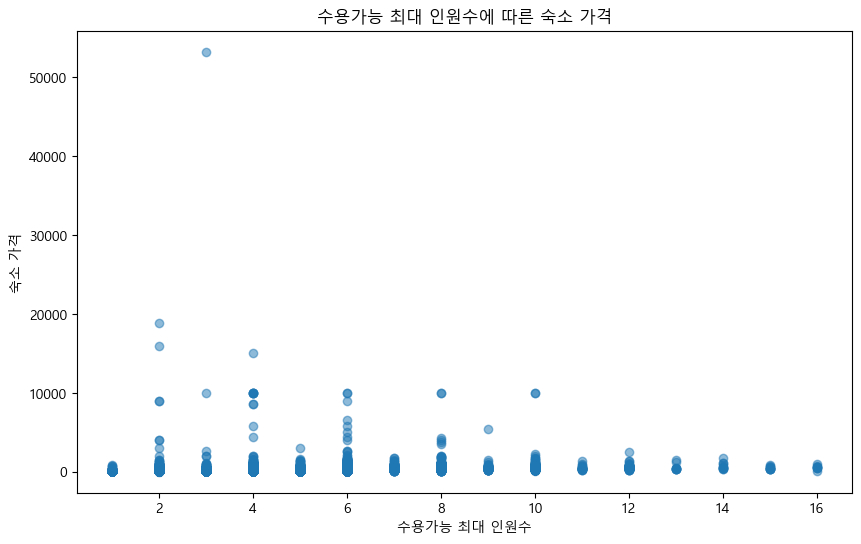

In [9]:
# 숙소 가격과 수용가능한 최대 인원수 사이의 관계 탐색
plt.figure(figsize=(10, 6))
plt.scatter(df['수용_인원수'], df['숙소_가격'], alpha=0.5)
plt.title('수용가능 최대 인원수에 따른 숙소 가격')
plt.xlabel('수용가능 최대 인원수')
plt.ylabel('숙소 가격')
plt.show()

df에서 숫자형 데이터들만 추출하여 pariplot 그려보기
 - 리뷰항목들
 - 숙소별

In [10]:
df.columns

Index(['숙소_id', '호스트_id', '슈퍼호스트', '숙소_수', '숙소_지역', '숙소_유형', '수용_인원수', '욕실수',
       '침실수', '침대수', '편의시설', '숙소_가격', '최소_숙박일', '최대_숙박일', '리뷰수', '30일_리뷰수',
       '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
       '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', 'url', '숙소_특징', '12개월_리뷰수',
       '예약가능여부', '마지막_리뷰', '슈퍼호스트_인코딩', '마지막_리뷰_year'],
      dtype='object')

In [11]:
df_review = df[['슈퍼호스트_인코딩','리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', 
               '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']]
df_lodging = df[['슈퍼호스트_인코딩','수용_인원수', '욕실수', '침실수', '침대수','숙소_가격', '최소_숙박일', '최대_숙박일']]

슈퍼호스트 기준
 - '리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수'

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



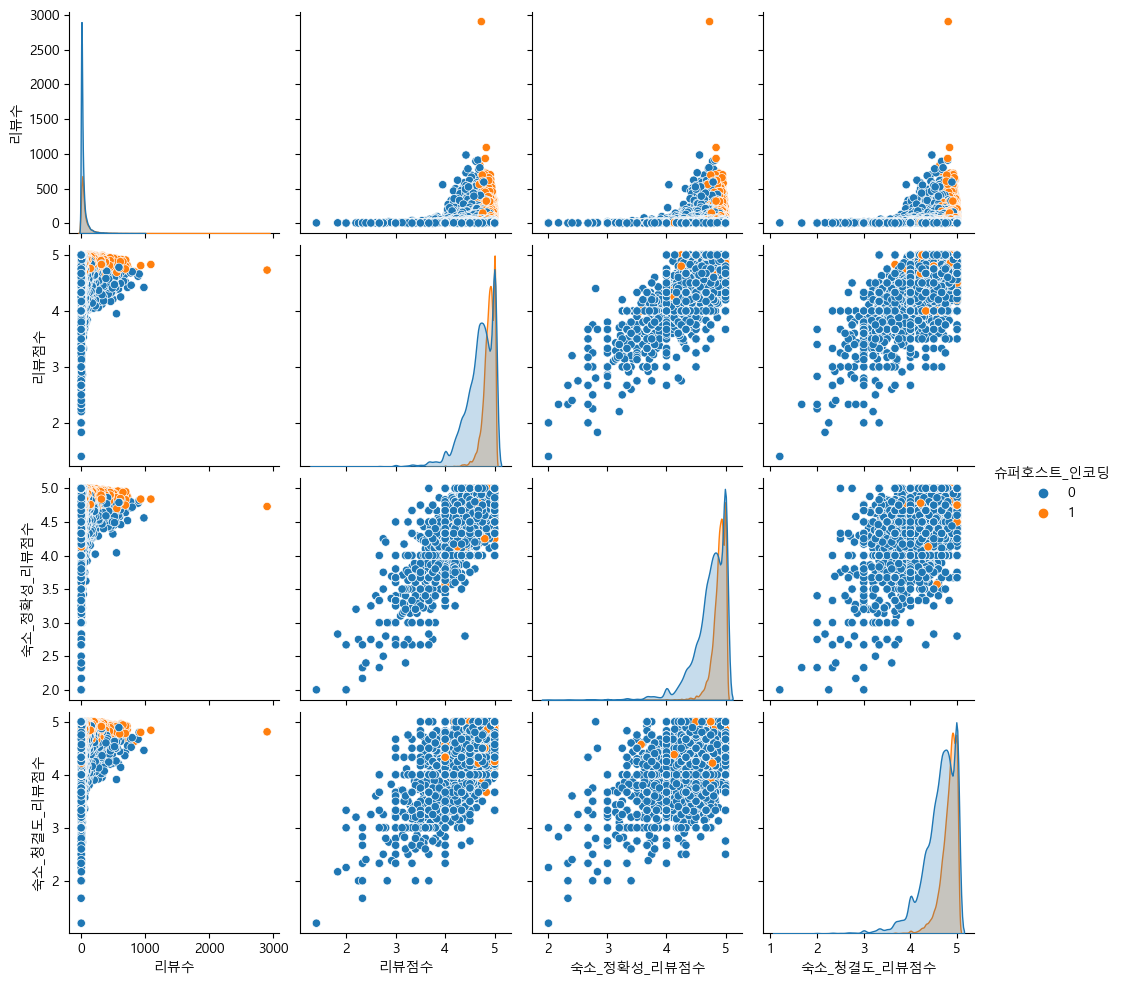

In [12]:
sns.pairplot(df_review, vars=['리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수'], height=2.5, hue='슈퍼호스트_인코딩')
plt.show()

슈퍼호스트 기준
 - '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



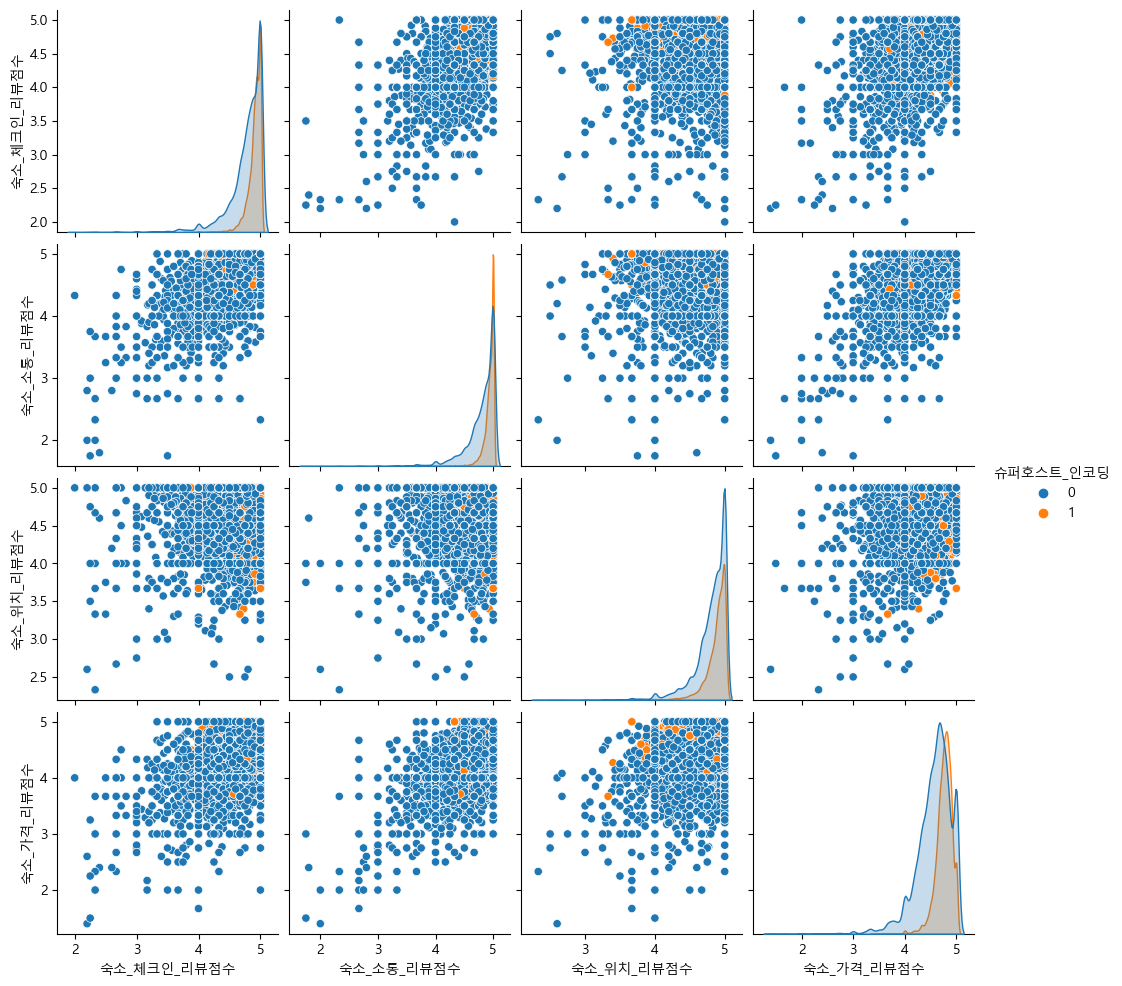

In [13]:
sns.pairplot(df_review, vars=['숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'], height=2.5, hue='슈퍼호스트_인코딩')
plt.show()

슈퍼호스트 기준
 - '수용_인원수', '욕실수', '침실수', '침대수'

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



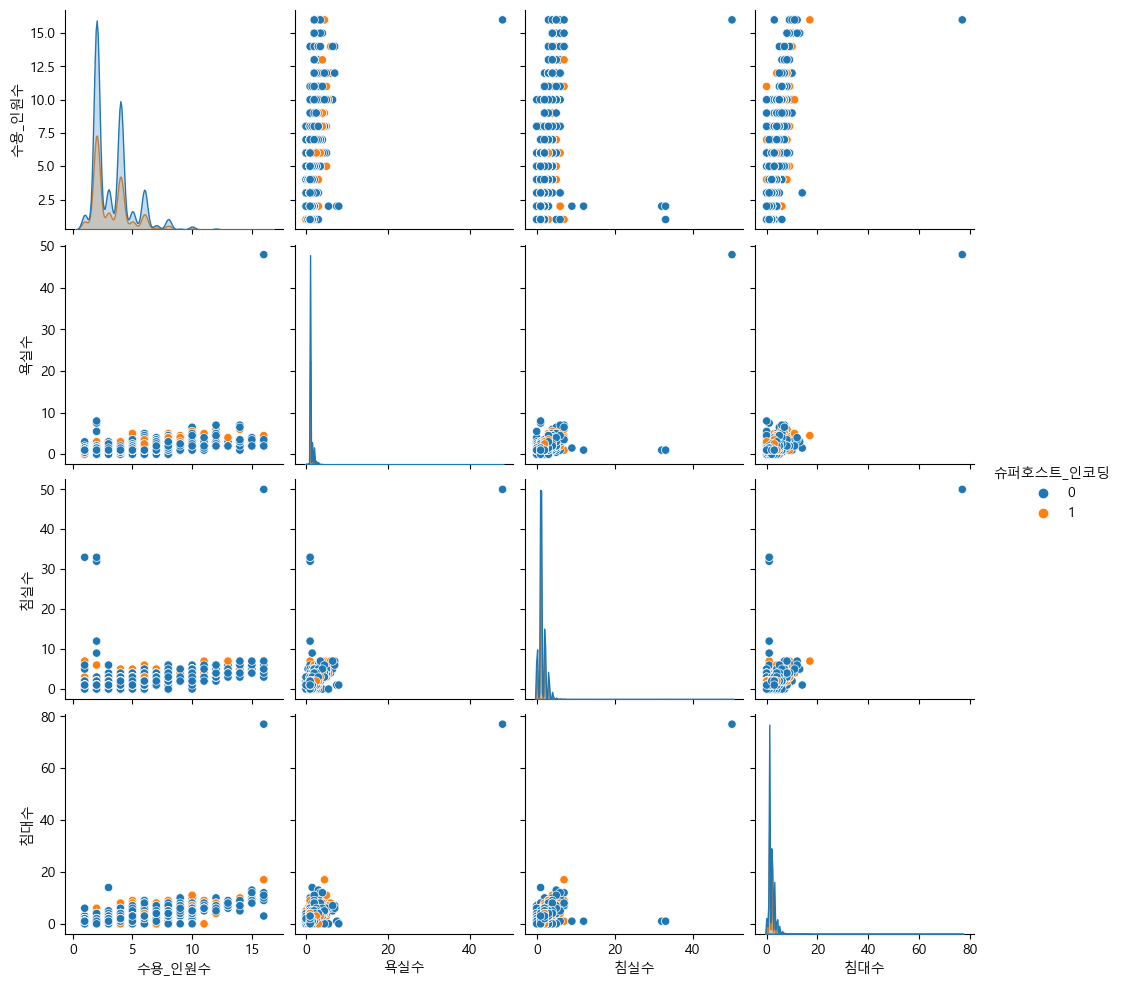

In [14]:
sns.pairplot(df_lodging, vars=['수용_인원수', '욕실수', '침실수', '침대수'], height=2.5, hue='슈퍼호스트_인코딩')
plt.show()

슈퍼호스트 기준
 - '숙소_가격', '최소_숙박일', '최대_숙박일'

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



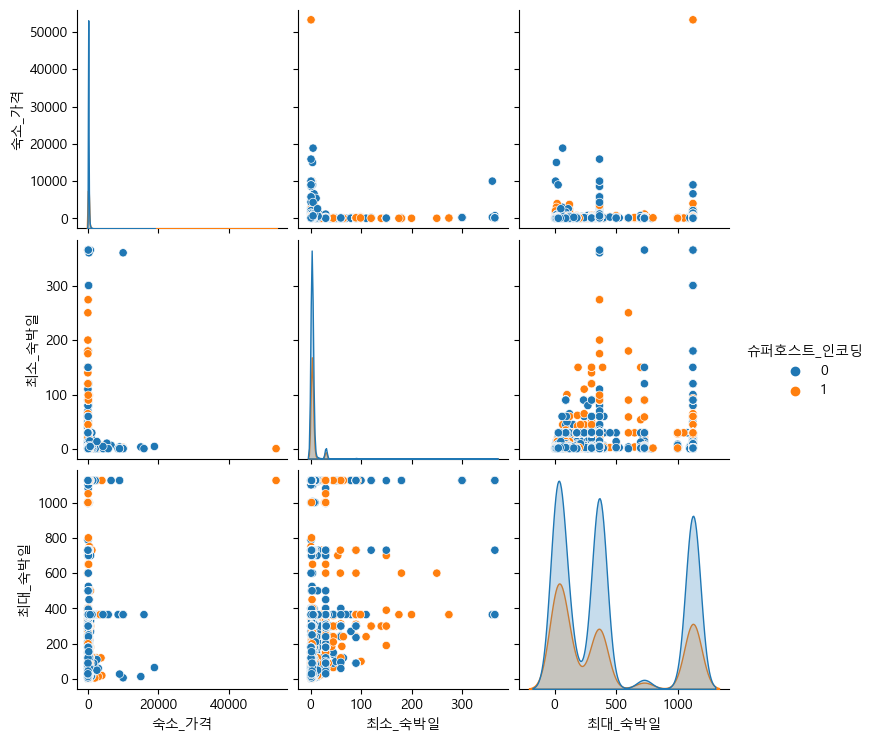

In [15]:
sns.pairplot(df_lodging, vars=['숙소_가격', '최소_숙박일', '최대_숙박일'], height=2.5, hue='슈퍼호스트_인코딩')
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30990 entries, 1 to 83393
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   숙소_id        30990 non-null  int64         
 1   호스트_id       30990 non-null  int64         
 2   슈퍼호스트        30990 non-null  object        
 3   숙소_수         30990 non-null  float64       
 4   숙소_지역        30990 non-null  object        
 5   숙소_유형        30990 non-null  object        
 6   수용_인원수       30990 non-null  int64         
 7   욕실수          30990 non-null  float64       
 8   침실수          30990 non-null  float64       
 9   침대수          30990 non-null  float64       
 10  편의시설         30990 non-null  object        
 11  숙소_가격        30990 non-null  float64       
 12  최소_숙박일       30990 non-null  int64         
 13  최대_숙박일       30990 non-null  int64         
 14  리뷰수          30990 non-null  int64         
 15  30일_리뷰수      30990 non-null  int64         
 16  리뷰점수     

어느 지역에 슈퍼호스트가 많을까?

In [17]:
df['슈퍼호스트'].value_counts()

슈퍼호스트
f    20946
t    10044
Name: count, dtype: int64

In [18]:
df['숙소_지역'].value_counts()

숙소_지역
Buttes-Montmartre      3263
Popincourt             2814
Entrepôt               2288
Vaugirard              2234
Batignolles-Monceau    1808
Temple                 1671
Passy                  1635
Buttes-Chaumont        1573
Ménilmontant           1561
Opéra                  1553
Bourse                 1422
Hôtel-de-Ville         1216
Reuilly                1159
Observatoire           1080
Panthéon               1061
Élysée                  999
Gobelins                967
Luxembourg              911
Palais-Bourbon          906
Louvre                  869
Name: count, dtype: int64

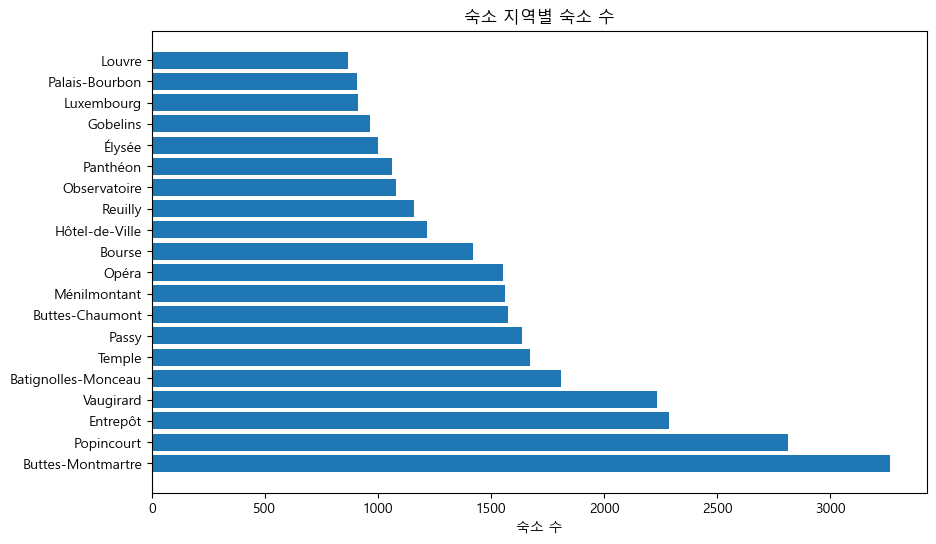

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

counts = df['숙소_지역'].value_counts()

plt.figure(figsize=(10, 6))
plt.barh(counts.index, counts)
plt.xlabel('숙소 수')
plt.title('숙소 지역별 숙소 수')
plt.show()

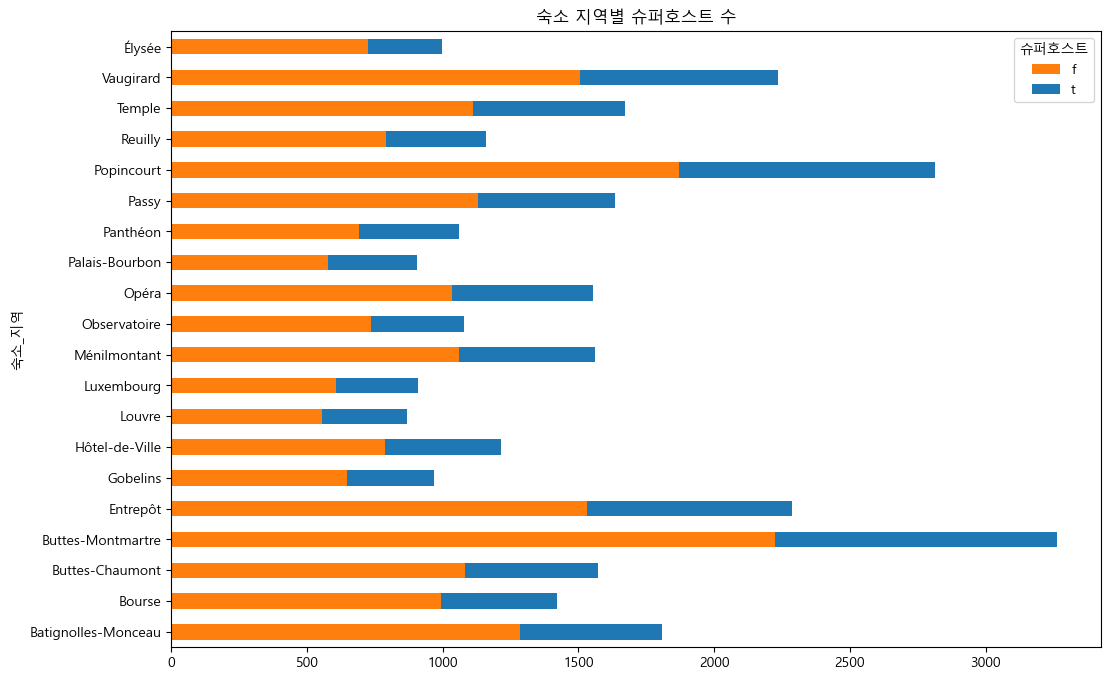

In [20]:
# 슈퍼호스트 여부에 대한 누적 가로 막대 그래프
superhost_by_region = df.groupby(['숙소_지역', '슈퍼호스트']).size().unstack().fillna(0)

superhost_by_region.plot(kind='barh', stacked=True, figsize=(12, 8), color=['#FF7F0E', '#1F77B4'])
plt.title('숙소 지역별 슈퍼호스트 수')
plt.show()


편의시설

In [21]:
df['편의시설']

1        ["Lockbox", "Wifi", "Kitchen", "Refrigerator",...
2        ["Cooking basics", "Long term stays allowed", ...
3        ["Shampoo", "Kitchen", "Washer", "Cooking basi...
6        ["Cooking basics", "Wifi", "Dedicated workspac...
8        ["Shampoo", "Freezer", "Kitchen", "Extra pillo...
                               ...                        
82649    ["Extra pillows and blankets", "Wifi", "Dining...
82975    ["Cleaning products", "Essentials", "Body soap...
83073    ["Cooking basics", "Wifi", "Hangers", "Bed lin...
83158    ["Cooking basics", "Pets allowed", "Hangers", ...
83393    ["Cooking basics", "Heating", "Bed linens", "D...
Name: 편의시설, Length: 30990, dtype: object

In [22]:
df['편의시설'].value_counts()

편의시설
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               163
["Fire extinguisher", "Wifi", "TV", "Shampoo", "Hangers", "Heating", "Essentials", "Air conditioning", "Elevator", "Smoke alarm", "Hair dryer"]               

In [23]:
# 각 숙소의 편의시설을 모두 포함하는 리스트 만들기
all_facilities = df['편의시설'].apply(eval).sum()

# 각 편의시설의 빈도수 계산
facility_counts = pd.Series(all_facilities).value_counts()

# 가장 많이 나오는 편의시설 상위 10개 출력
top_facilities = facility_counts.head(10)
print(top_facilities)

Kitchen                  29420
Essentials               27989
Hot water                26934
Wifi                     26843
Dishes and silverware    26716
Hair dryer               25785
Cooking basics           25628
Smoke alarm              24814
Bed linens               24394
Refrigerator             23728
Name: count, dtype: int64


가장 많은 편의시설 TOP 10

주방<br>
에센셜<br>
온수<br>
와이파이<br>
식기 및 은식기<br> 
헤어드라이기<br>
요리 기초<br> 
연기경보기<br> 
침대 린넨<br> 
냉장고<br> 

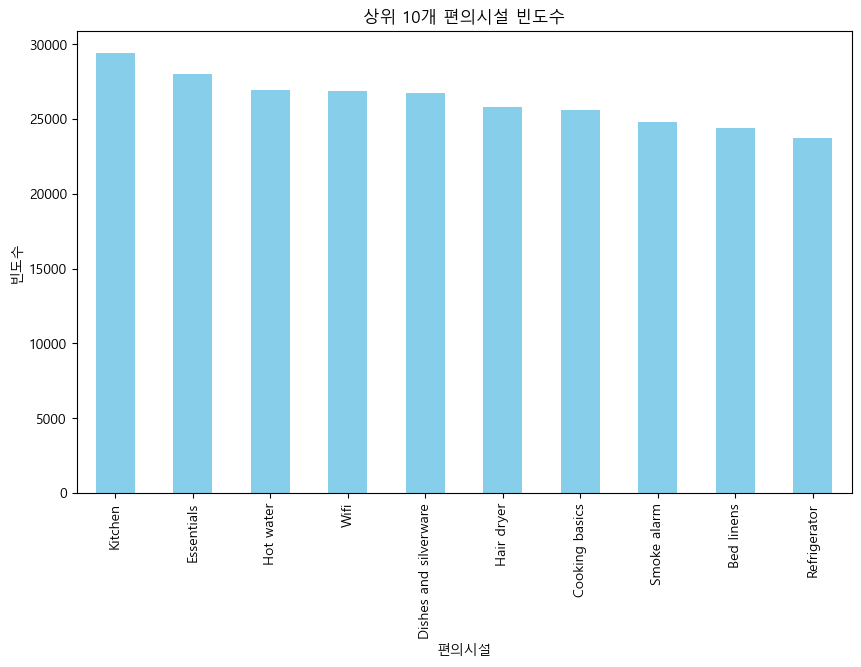

In [24]:
# 상위 10개 편의시설을 바 그래프로 출력
plt.figure(figsize=(10, 6))
top_facilities.plot(kind='bar', color='skyblue')
plt.title('상위 10개 편의시설 빈도수')
plt.xlabel('편의시설')
plt.ylabel('빈도수')
plt.show()

In [25]:
# 편의시설 top 10으로 나온 값들의 숙소 지역 빈도수 확인
top_facility_list = top_facilities.index.tolist()  # 상위 10개 편의시설 리스트
facility_top_df = df[df['편의시설'].apply(lambda x: any(item for item in top_facility_list if item in eval(x)))]  # 상위 편의시설을 포함하는 숙소만 필터링
facility_top_counts = facility_top_df['숙소_지역'].value_counts()  # 숙소 지역별 빈도수 계산

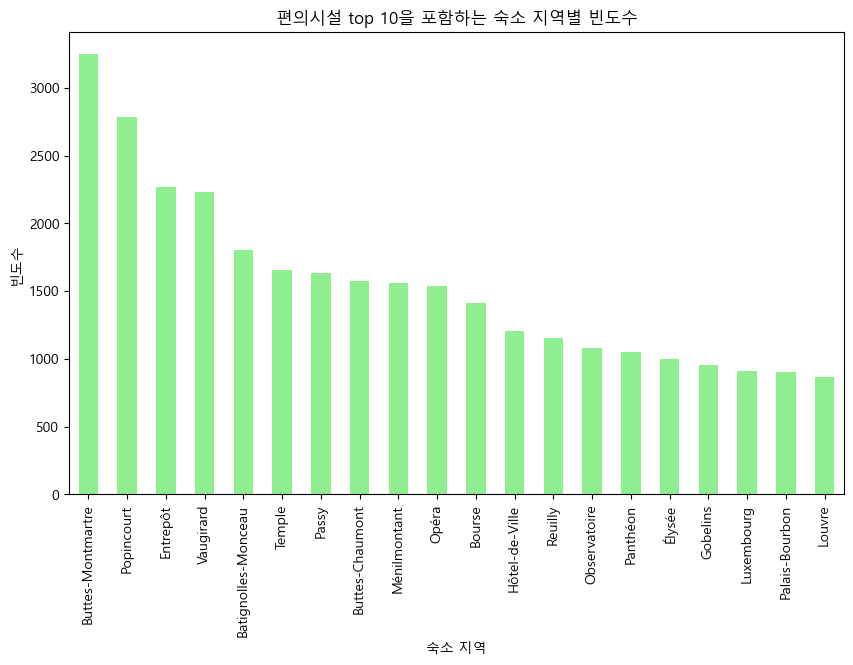

In [26]:

# 숙소 지역별 빈도수를 바 그래프로 출력
plt.figure(figsize=(10, 6))
facility_top_counts.plot(kind='bar', color='lightgreen')
plt.title('편의시설 top 10을 포함하는 숙소 지역별 빈도수')
plt.xlabel('숙소 지역')
plt.ylabel('빈도수')
plt.show()


C:\Users\rladn\AppData\Local\Temp\ipykernel_14008\3786662866.py:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\rladn\AppData\Local\Temp\ipykernel_14008\3786662866.py:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



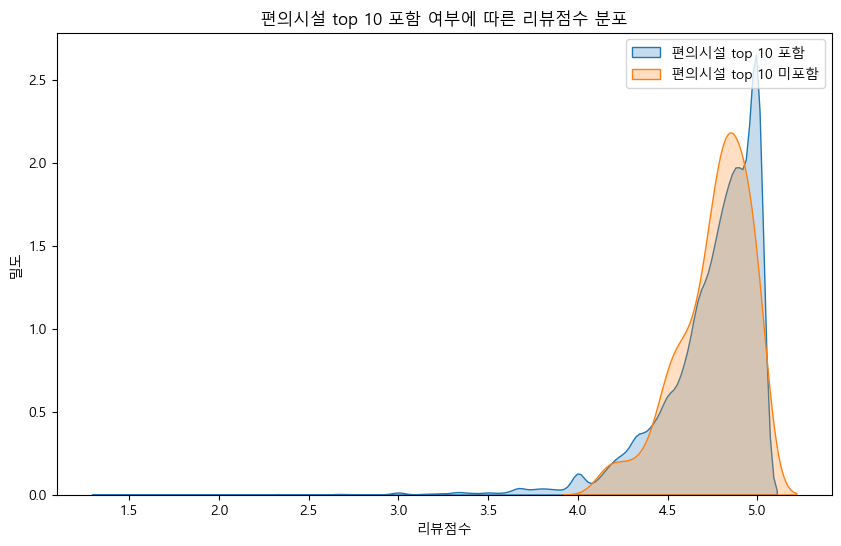

In [27]:
# 편의시설 top 10이 포함된 숙소
df_top_facilities = df[df['편의시설'].apply(lambda x: any(item for item in top_facility_list if item in x))]

# 편의시설 top 10이 포함되지 않은 숙소
df_other_facilities = df[~df['편의시설'].apply(lambda x: any(item for item in top_facility_list if item in x))]

# 편의시설 top 10이 포함된 숙소와 포함되지 않은 숙소의 리뷰점수 비교
plt.figure(figsize=(10, 6))
sns.kdeplot(df_top_facilities['리뷰점수'], label='편의시설 top 10 포함', shade=True)
sns.kdeplot(df_other_facilities['리뷰점수'], label='편의시설 top 10 미포함', shade=True)
plt.title('편의시설 top 10 포함 여부에 따른 리뷰점수 분포')
plt.xlabel('리뷰점수')
plt.ylabel('밀도')
plt.legend()
plt.show()

In [28]:
len(df_other_facilities)

168

In [29]:
len(df_top_facilities)

30822

두 변수의 개수 차이가 너무 많이 발생하여 유의미한 결과값이라고 보기 어려움.

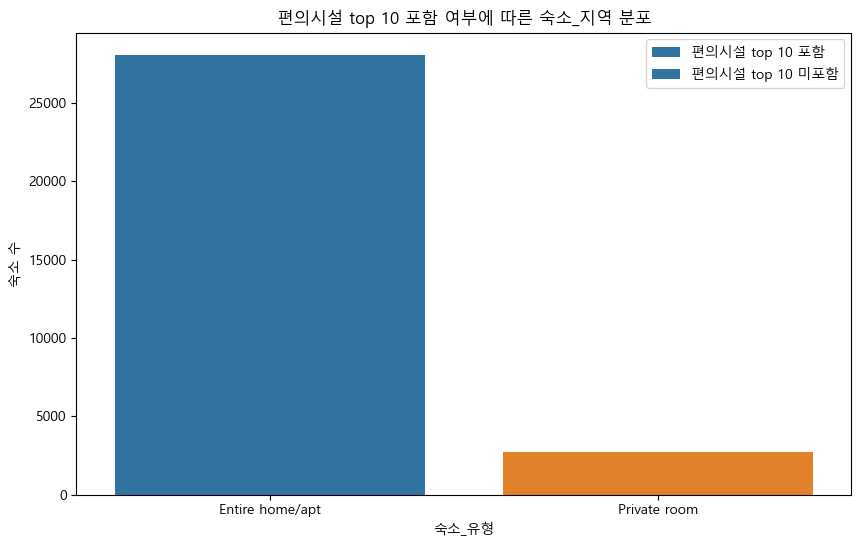

In [42]:
# 편의시설 top 10이 포함된 숙소와 포함되지 않은 숙소의 숙소_ 유형교
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_facilities, x='숙소_유형', label='편의시설 top 10 포함')
sns.countplot(data=df_other_facilities, x='숙소_유형', label='편의시설 top 10 미포함')
plt.title('편의시설 top 10 포함 여부에 따른 숙소_지역 분포')
plt.xlabel('숙소_유형')
plt.ylabel('숙소 수')
plt.legend()
plt.show()

In [36]:
# 가장 적게 나오는 편의시설 상위 10개 출력
bottom_facilities = facility_counts.tail(100)
print(bottom_facilities)

30" HDTV with Chromecast                                                                         1
Audiopro Bluetooth sound system                                                                  1
HDTV with Chromecast, Disney+, HBO Max, Netflix                                                  1
Enceintes Logitec avec caisson de basses sound system with Bluetooth and aux                     1
43" HDTV with Amazon Prime Video, Disney+, Netflix, DVD player                                   1
                                                                                                ..
65" HDTV with Amazon Prime Video, Chromecast, Disney+, Netflix, premium cable, standard cable    1
29" HDTV with standard cable                                                                     1
Fast wifi – 574 Mbps                                                                             1
Dietrich  oven                                                                                   1
Distributi